<a href="https://colab.research.google.com/github/Varshini-svnit/ML_LABS/blob/main/MLlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing dataset shape: (545, 13)
Advertising dataset shape: (200, 4)

=== Housing Dataset Results ===
  Missing           Scaling  R2_Before_Outlier_Removal  \
0    zero   min_max_scaling                   0.561583   
1    zero  standard_scaling                   0.561583   
2    mean   min_max_scaling                   0.561583   
3    mean  standard_scaling                   0.561583   
4  median   min_max_scaling                   0.561583   
5  median  standard_scaling                   0.561583   

   R2_After_Outlier_Removal  
0                  0.365161  
1                  0.365161  
2                  0.365161  
3                  0.365161  
4                  0.365161  
5                  0.365161  

=== Advertising Dataset Results ===
  Missing           Scaling  R2_Before_Outlier_Removal  \
0    zero   min_max_scaling                   0.902591   
1    zero  standard_scaling                   0.902591   
2    mean   min_max_scaling                   0.902591   
3    mean  s

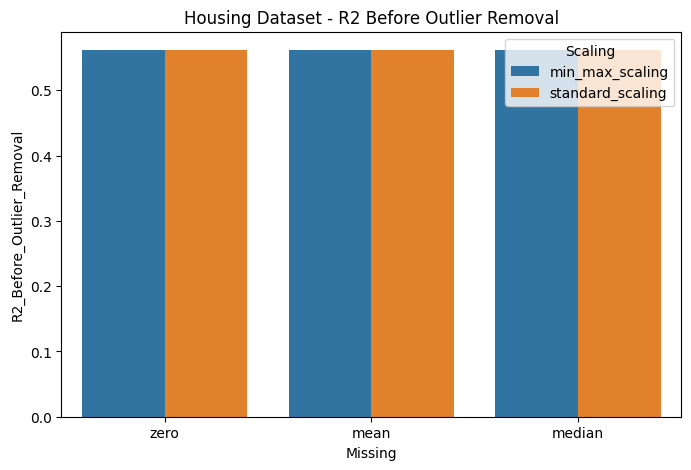

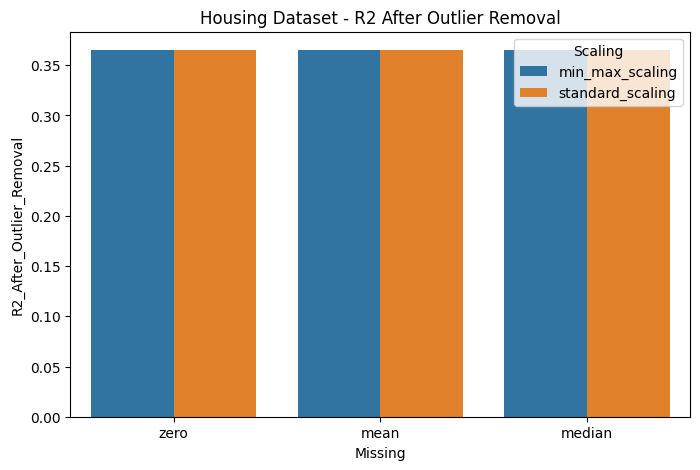

In [1]:
# ===========================
# ML Lab-2 - Task 1
# Dataset: Housing.csv & advertising.csv
# ===========================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load datasets
# ---------------------------
housing_df = pd.read_csv("/content/Housing.csv")
adv_df = pd.read_csv("/content/advertising.csv")

print("Housing dataset shape:", housing_df.shape)
print("Advertising dataset shape:", adv_df.shape)

# ---------------------------
# Missing value handling
# ---------------------------
def fill_missing(data, method="mean"):
    df_copy = data.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        if df_copy[col].isnull().sum() > 0:
            if method == "mean":
                df_copy[col].fillna(df_copy[col].mean(), inplace=True)
            elif method == "median":
                df_copy[col].fillna(df_copy[col].median(), inplace=True)
            elif method == "zero":
                df_copy[col].fillna(0, inplace=True)
    return df_copy

# ---------------------------
# Scaling functions
# ---------------------------
def min_max_scaling(data):
    df_copy = data.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        df_copy[col] = (df_copy[col] - df_copy[col].min()) / (df_copy[col].max() - df_copy[col].min())
    return df_copy

def standard_scaling(data):
    df_copy = data.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        df_copy[col] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    return df_copy

# ---------------------------
# Outlier removal (IQR method)
# ---------------------------
def remove_outliers(data):
    df_copy = data.copy()
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df_copy[col] >= (Q1 - 1.5 * IQR)) & (df_copy[col] <= (Q3 + 1.5 * IQR))
        df_copy = df_copy[mask]
    return df_copy

# ---------------------------
# Regression function
# ---------------------------
def run_regression(data, target):
    df_copy = data.dropna()
    X = df_copy.drop(columns=[target])
    y = df_copy[target]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# ---------------------------
# Experiment runner
# ---------------------------
def preprocessing_experiments(df, target):
    methods = ["zero", "mean", "median"]
    scalings = [min_max_scaling, standard_scaling]
    results = []
    for method in methods:
        df_filled = fill_missing(df, method)
        for scale in scalings:
            df_scaled = scale(df_filled)
            score_before = run_regression(df_scaled, target)
            df_no_outliers = remove_outliers(df_scaled)
            score_after = run_regression(df_no_outliers, target)

            results.append({
                "Missing": method,
                "Scaling": scale.__name__,
                "R2_Before_Outlier_Removal": score_before,
                "R2_After_Outlier_Removal": score_after
            })
    return pd.DataFrame(results)

# ---------------------------
# Run experiments
# ---------------------------
print("\n=== Housing Dataset Results ===")
housing_results = preprocessing_experiments(housing_df.select_dtypes(include=[np.number]), target="price")
print(housing_results)

print("\n=== Advertising Dataset Results ===")
adv_results = preprocessing_experiments(adv_df.select_dtypes(include=[np.number]), target="Sales")
print(adv_results)

# ---------------------------
# Visualize Housing dataset
# ---------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=housing_results, x="Missing", y="R2_Before_Outlier_Removal", hue="Scaling")
plt.title("Housing Dataset - R2 Before Outlier Removal")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=housing_results, x="Missing", y="R2_After_Outlier_Removal", hue="Scaling")
plt.title("Housing Dataset - R2 After Outlier Removal")
plt.show()


# New section

In [3]:
# ===========================
# ML Lab-2 - Task 2
# Dataset: faa_ai_prelim.csv
# ===========================

import pandas as pd

# ---------------------------
# Load dataset
# ---------------------------
aviation_df = pd.read_csv("/content/faa_ai_prelim.csv")

# ---------------------------
# Convert date & time into datetime
# ---------------------------
if 'DATE' in aviation_df.columns and 'TIME' in aviation_df.columns:
    aviation_df['datetime'] = pd.to_datetime(
        aviation_df['DATE'].astype(str) + ' ' + aviation_df['TIME'].astype(str), errors='coerce'
    )

# ---------------------------
# Keep only required columns (if they exist in your CSV)
# ---------------------------
required_cols = ['MAKE', 'STATE', 'MODEL', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'ACFT_DMG_DESC']
existing_cols = [col for col in required_cols if col in aviation_df.columns]
aviation_df = aviation_df[existing_cols]

# ---------------------------
# Replace missing Fatal Flag with "No"
# ---------------------------
# Replace missing Fatal Flag with "No"
if 'FATAL_FLAG' in aviation_df.columns:
    aviation_df['FATAL_FLAG'] = aviation_df['FATAL_FLAG'].fillna("No")

# Fill FLT_PHASE with mode
if 'FLT_PHASE' in aviation_df.columns:
    aviation_df['FLT_PHASE'] = aviation_df['FLT_PHASE'].fillna(aviation_df['FLT_PHASE'].mode()[0])

# Fill ACFT_DMG_DESC with mode
if 'ACFT_DMG_DESC' in aviation_df.columns:
    aviation_df['ACFT_DMG_DESC'] = aviation_df['ACFT_DMG_DESC'].fillna(aviation_df['ACFT_DMG_DESC'].mode()[0])


# ---------------------------
# Drop rows where MAKE is missing
# ---------------------------
if 'MAKE' in aviation_df.columns:
    aviation_df.dropna(subset=['MAKE'], inplace=True)

# ---------------------------
# Drop columns with more than 75% missing values
# ---------------------------
aviation_df.dropna(axis=1, thresh=0.25*len(aviation_df), inplace=True)

# ---------------------------
# Group by aircraft name
# ---------------------------
if 'MAKE' in aviation_df.columns:
    print("\nAircraft counts:\n", aviation_df.groupby('MAKE').size())

# ---------------------------
# Display fatal cases
# ---------------------------
if 'FATAL_FLAG' in aviation_df.columns:
    fatal_cases = aviation_df[aviation_df['FATAL_FLAG'] == 'Yes']
    print("\nFatal cases:\n", fatal_cases)

# ---------------------------
# One-hot encode ACFT_DMG_DESC
# ---------------------------
if 'ACFT_DMG_DESC' in aviation_df.columns:
    aviation_df = pd.get_dummies(aviation_df, columns=['ACFT_DMG_DESC'], drop_first=True)

# ---------------------------
# Feature engineering: Extract phase from RMK_TEXT
# ---------------------------
def extract_phase(text):
    if pd.isnull(text): return 'UNKNOWN'
    text = text.upper()
    for phase in ['LANDING', 'TAKEOFF', 'CRUISE', 'APPROACH']:
        if phase in text:
            return phase
    return 'UNKNOWN'

if 'RMK_TEXT' in aviation_df.columns:
    aviation_df['FLIGHT_PHASE_TEXT'] = aviation_df['RMK_TEXT'].apply(extract_phase)

# ---------------------------
# Compare extracted phase with original FLT_PHASE
# ---------------------------
if 'FLT_PHASE' in aviation_df.columns and 'FLIGHT_PHASE_TEXT' in aviation_df.columns:
    match_percentage = (aviation_df['FLIGHT_PHASE_TEXT'] == aviation_df['FLT_PHASE']).mean() * 100
    print(f"\nMatch between extracted FLIGHT_PHASE_TEXT and FLT_PHASE: {match_percentage:.2f}%")

# ---------------------------
# Final processed dataframe sample
# ---------------------------
print("\nProcessed Aviation Data Sample:\n", aviation_df.head())



Fatal cases:
                                              RMK_TEXT      FLT_PHASE  \
0   AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...  UNKNOWN (UNK)   
22  AIRCRAFT, LIGHT SPORT EVOLUTION REVO,  ON TAKE...  TAKEOFF (TOF)   
53  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...  UNKNOWN (UNK)   
55  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...  UNKNOWN (UNK)   
79  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...  UNKNOWN (UNK)   
80  N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...  UNKNOWN (UNK)   
81  N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...  UNKNOWN (UNK)   
82  N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...  UNKNOWN (UNK)   

   EVENT_TYPE_DESC FATAL_FLAG ACFT_DMG_DESC  
0         Accident        Yes       Unknown  
22        Accident        Yes   Substantial  
53        Accident        Yes     Destroyed  
55        Accident        Yes     Destroyed  
79        Accident        Yes     Destroyed  
80        Accident        Yes     Destroyed  
81        Acci

# New section

In [4]:
# Install Git if not installed
!apt-get install git

# Configure your Git username and email (once per runtime)
!git config --global user.name "Varshini-svnit"
!git config --global user.email "u23ai116@coed.svnit.ac.in"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [6]:
!git clone https://github.com/Varshini-svnit/ML_LABS.git


Cloning into 'ML_LABS'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 7.50 KiB | 3.75 MiB/s, done.


In [7]:
!cp MLlab2.ipynb ML_LABS/


cp: cannot stat 'MLlab2.ipynb': No such file or directory
